In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!cd  /content/drive/MyDrive/emoji_test
!ls

drive  sample_data


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/emoji_test/emoji_prediction/mapped_data.csv")
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Text,Index
0,"['限時', '抽獎', '滿滿的', '畢業', '祝福', '真幸福']",0
1,"['小編', '團隊', '加碼', '完成', '下方', '任務', '祝福', '分享...",1
2,"['重複', '留言', '提高', '命中率']",3
3,"['祝', '畢業', '快樂', '呦']",15
4,"['祝', '畢業', '快樂', '呦']",8
5,"['畢業', '快樂']",17
6,"['畢業', '快樂', '倒數']",11
7,"['新創', '產業', '崛起', '成為', '不少', '社會', '新鮮', '求職...",0
8,"['永悅', '數位', '健康', '新創', '公司']",0
9,"['滿滿的', '機會', '等', '同學', '拿下']",0


### Over-sampling data

In [ ]:
X = df["Text"].values
y = df["Index"].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

In [ ]:
X = X.reshape(-1,)
X.shape

(58980,)

### Tokenization

In [ ]:
import ast
tokenized_sentences = []
for sentence in X:
  actual_list = ast.literal_eval(sentence)
  tokenized_sentences.append(actual_list)

print("Tokenized Sentences (first 10 sentences with stopwords removed):")
for i, sentence in enumerate(tokenized_sentences[:10]):
    print(sentence)

Tokenized Sentences (first 10 sentences with stopwords removed):
['限時', '抽獎', '滿滿的', '畢業', '祝福', '真幸福']
['小編', '團隊', '加碼', '完成', '下方', '任務', '祝福', '分享', '出去']
['重複', '留言', '提高', '命中率']
['祝', '畢業', '快樂', '呦']
['祝', '畢業', '快樂', '呦']
['畢業', '快樂']
['畢業', '快樂', '倒數']
['新創', '產業', '崛起', '成為', '不少', '社會', '新鮮', '求職', '首選']
['永悅', '數位', '健康', '新創', '公司']
['滿滿的', '機會', '等', '同學', '拿下']


In [ ]:
from keras.preprocessing.text import Tokenizer

# 將分詞結果轉換為文本形式，以便 Tokenizer 使用
tokenized_texts = [" ".join(sentence) for sentence in tokenized_sentences]

# 初始化 Tokenizer 並擬合文本數據
tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(tokenized_texts) #字按照頻率排序會計算文本數據中每個詞語的出現頻率，並基於這些頻率構建一個詞彙表。這個詞彙表可以用來將文本轉換為數字序列。

print("Text \n",tokenized_texts[:10],'\n')

# 將文本轉換為數字序列
X_seqs = tokenizer.texts_to_sequences(tokenized_texts)
# 打印數字序列
print("Sequences:")
X_seqs[:10]

Text 
 ['限時 抽獎 滿滿的 畢業 祝福 真幸福', '小編 團隊 加碼 完成 下方 任務 祝福 分享 出去', '重複 留言 提高 命中率', '祝 畢業 快樂 呦', '祝 畢業 快樂 呦', '畢業 快樂', '畢業 快樂 倒數', '新創 產業 崛起 成為 不少 社會 新鮮 求職 首選', '永悅 數位 健康 新創 公司', '滿滿的 機會 等 同學 拿下'] 

Sequences:


[[1198, 1091, 954, 994, 329, 14417],
 [226, 2923, 3618, 280, 14418, 12638, 329, 62, 1213],
 [3619, 238, 9292, 12639],
 [545, 994, 131, 532],
 [545, 994, 131, 532],
 [994, 131],
 [994, 131, 3214],
 [12640, 14419, 14420, 908, 772, 2586, 2208, 6261, 2362],
 [14421, 5863, 156, 12640, 909],
 [954, 88, 48, 736, 12641]]

In [ ]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,20):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> 哥
Index:  2 ----> 真的
Index:  3 ----> 加油
Index:  4 ----> 台灣
Index:  5 ----> 我們
Index:  6 ----> 想
Index:  7 ----> 希望
Index:  8 ----> 總統
Index:  9 ----> 吃
Index:  10 ----> 不
Index:  11 ----> 看
Index:  12 ----> 演唱会
Index:  13 ----> 票
Index:  14 ----> 马来西亚
Index:  15 ----> 抢
Index:  16 ----> 自己
Index:  17 ----> 一起
Index:  18 ----> 加场
Index:  19 ----> 喜歡


In [ ]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 17508


padding (把seqence轉成一樣長度)

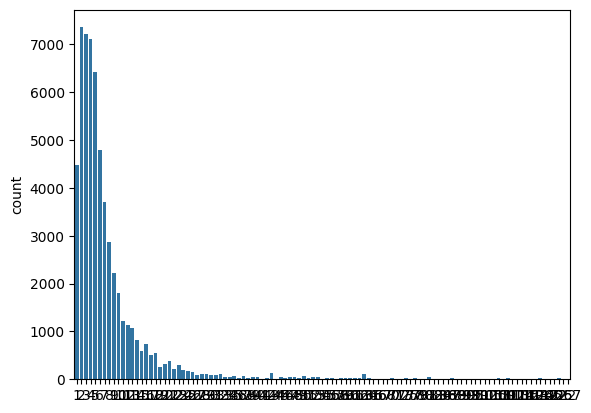

In [ ]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [ ]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[1198, 1091, 954, 994, 329, 14417]]

After Padding
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0  1198  1091
    954   994   329 14417]]


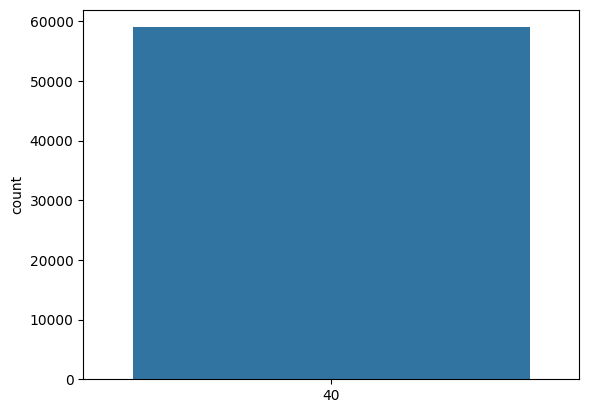

In [ ]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.2, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (47184, 40)
Training y Dim  (47184,)
Test X Dim  (11796, 40)
Test y Dim  (11796,)


### LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=20

model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(LSTM(units = 80, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 40))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 20)            350180    
                                                                 
 lstm (LSTM)                 (None, 40, 80)            32320     
                                                                 
 dropout (Dropout)           (None, 40, 80)            0         
                                                                 
 lstm_1 (LSTM)               (None, 40)                19360     
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 20)                820       
                                                                 
Total params: 402680 (1.54 MB)
Trainable params: 402680 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=1,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=128
epochs = 20


Epoch 1/20
369/369 [==============================] - 84s 203ms/step - loss: 2.6541 - accuracy: 0.1780 - val_loss: 2.1045 - val_accuracy: 0.3675
Epoch 2/20
369/369 [==============================] - 78s 211ms/step - loss: 1.8936 - accuracy: 0.4204 - val_loss: 1.6209 - val_accuracy: 0.5067
Epoch 3/20
369/369 [==============================] - 69s 187ms/step - loss: 1.5554 - accuracy: 0.5255 - val_loss: 1.4203 - val_accuracy: 0.5747
Epoch 4/20
369/369 [==============================] - 69s 186ms/step - loss: 1.3920 - accuracy: 0.5738 - val_loss: 1.3272 - val_accuracy: 0.6047
Epoch 5/20
369/369 [==============================] - 54s 147ms/step - loss: 1.2920 - accuracy: 0.6088 - val_loss: 1.2616 - val_accuracy: 0.6278
Epoch 6/20
369/369 [==============================] - 51s 139ms/step - loss: 1.2203 - accuracy: 0.6356 - val_loss: 1.2143 - val_accuracy: 0.6400
Epoch 7/20
369/369 [==============================] - 58s 156ms/step - loss: 1.1647 - accuracy: 0.6544 - val_loss: 1.1794 - val_ac

In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

93/93 [==============================] - 4s 41ms/step - loss: 1.0548 - accuracy: 0.7028


[1.0548404455184937, 0.7027806043624878]

### Bidirectional-LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=128


model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 128)           2241152   
                                                                 
 bidirectional (Bidirection  (None, 40, 160)           133760    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40, 160)           154240    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 160)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 160)               0         
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=64
epochs = 15

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs,
          shuffle=True,validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/15
738/738 [==============================] - 256s 331ms/step - loss: 2.4459 - accuracy: 0.2354 - val_loss: 1.7079 - val_accuracy: 0.4735
Epoch 2/15
738/738 [==============================] - 233s 316ms/step - loss: 1.5768 - accuracy: 0.5158 - val_loss: 1.3125 - val_accuracy: 0.5876
Epoch 3/15
738/738 [==============================] - 249s 337ms/step - loss: 1.2705 - accuracy: 0.6128 - val_loss: 1.1635 - val_accuracy: 0.6450
Epoch 4/15
738/738 [==============================] - 237s 321ms/step - loss: 1.1076 - accuracy: 0.6681 - val_loss: 1.0799 - val_accuracy: 0.6741
Epoch 5/15
738/738 [==============================] - 232s 315ms/step - loss: 1.0082 - accuracy: 0.6959 - val_loss: 1.0441 - val_accuracy: 0.6937
Epoch 6/15
738/738 [==============================] - 237s 321ms/step - loss: 0.9263 - accuracy: 0.7192 - val_loss: 1.0113 - val_accuracy: 0.7036
Epoch 7/15
738/738 [==============================] - 236s 320ms/step - loss: 0.8674 - accuracy: 0.7358 - val_loss: 1.0055 -

In [ ]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

185/185 [==============================] - 16s 85ms/step - loss: 0.9872 - accuracy: 0.7263


[0.9872250556945801, 0.7263479232788086]

### Mapping

In [ ]:
emoji_raw = open('/content/drive/MyDrive/emoji_test/emoji_prediction/top_20_emojis.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    sentence = sentence.rstrip()
    emojis.append(sentence)


emoji_dict={}

for e in emojis:
    idx = int(e.split()[0])
    emoji = e.split()[1]
    emoji_dict[idx] = emoji

In [ ]:
emoji_dict

{0: '😍',
 1: '❤',
 2: '😂',
 3: '🔥',
 4: '😭',
 5: '👏',
 6: '🙌',
 7: '😢',
 8: '🏻',
 9: '\U0001f979',
 10: '🤣',
 11: '✨',
 12: '👍',
 13: '🙏',
 14: '🥺',
 15: '\U0001faf6',
 16: '😆',
 17: '🥰',
 18: '👉',
 19: '💪'}

In [ ]:
import jieba
jieba.set_dictionary('/content/drive/MyDrive/emoji_test/emoji_prediction/dict.txt.big.txt')

def get_stopwords(file):
    stopword_list = []
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            stopword_list.append(line)
    return stopword_list

def remove_stopwords(sentence, stopwords):
    return [word for word in sentence if word not in stopwords and word.strip()]

stopwords = get_stopwords('/content/drive/MyDrive/emoji_test/emoji_prediction/stopwords.txt')

def preprocess_text(X):
    tokenized_sentences = []
    for sentence in X:
      words = list(jieba.cut(sentence))
      filtered_words = remove_stopwords(words, stopwords)
      tokenized_sentences.append(filtered_words)
    tokenized_texts = [" ".join(sentence) for sentence in tokenized_sentences]

    max_len=40
    X_seqs = tokenizer.texts_to_sequences(tokenized_texts)
    X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)
    return X_seqs_pd

In [ ]:
def predict_emoji(text):
    X_sequences = preprocess_text([text])
    predictions = np.argmax(model.predict(X_sequences), axis=1)
    emoji_idx = predictions[0]
    emoji = emoji_dict[emoji_idx]

    return emoji

In [ ]:
text = input("Enter text\n\n")

print("\n\nEmojified Text\n\n")
print(text + " " + predict_emoji(text))

Enter text

生日快樂


Emojified Text


1/1 [==============================] - 0s 38ms/step
生日快樂 👍


In [ ]:
paragraph = '''
近期（2024年3月直至今日），連續的食安風暴襲捲了臺灣及日本兩地，大至蘇丹紅色素案、寶林茶室中毒案、小林製藥紅麴產品汙染事件等，小至遍及全台各地的食品中毒事件，無不讓整體社會人心惶惶，甚至產生下列之疑惑：我們要如何確定生活中所吃到的任何食物（食品）都是安全的呢？食安相關規定又是如何為國人健康把關？以下筆者便會以上述所列之食安事件為例，除了為各位讀者簡述引發該案之緣由，更針對其涉及之食安規定、準則等做詳述及討論，讓大家能更認識食安的整體相關運作體系。

'''

In [ ]:
paragraph = input("Enter text\n\n")

Enter text

近期（2024年3月直至今日），連續的食安風暴襲捲了臺灣及日本兩地，大至蘇丹紅色素案、寶林茶室中毒案、小林製藥紅麴產品汙染事件等，小至遍及全台各地的食品中毒事件，無不讓整體社會人心惶惶，甚至產生下列之疑惑：我們要如何確定生活中所吃到的任何食物（食品）都是安全的呢？食安相關規定又是如何為國人健康把關？以下筆者便會以上述所列之食安事件為例，除了為各位讀者簡述引發該案之緣由，更針對其涉及之食安規定、準則等做詳述及討論，讓大家能更認識食安的整體相關運作體系。


In [ ]:
import re
def emojify_paragraph(paragraph):
    # 按行分割输入段落
    lines = re.split(r'[\n，。]', paragraph)
    emojified_lines = []

    # 逐行处理每一行
    for line in lines:
        if line.strip():  # 如果行非空
            emojified_line = line + predict_emoji(line)
            emojified_lines.append(emojified_line)
        else:
            emojified_lines.append(line)

    # 重新组合成一个段落
    emojified_paragraph = '\n'.join(emojified_lines)
    return emojified_paragraph

print(paragraph+'\n')
print(emojify_paragraph(paragraph))


近期（2024年3月直至今日），連續的食安風暴襲捲了臺灣及日本兩地，大至蘇丹紅色素案、寶林茶室中毒案、小林製藥紅麴產品汙染事件等，小至遍及全台各地的食品中毒事件，無不讓整體社會人心惶惶，甚至產生下列之疑惑：我們要如何確定生活中所吃到的任何食物（食品）都是安全的呢？食安相關規定又是如何為國人健康把關？以下筆者便會以上述所列之食安事件為例，除了為各位讀者簡述引發該案之緣由，更針對其涉及之食安規定、準則等做詳述及討論，讓大家能更認識食安的整體相關運作體系。

1/1 [==============================] - 0s 97ms/step
近期（2024年3月直至今日）🔥
連續的食安風暴襲捲了臺灣及日本兩地😍
大至蘇丹紅色素案、寶林茶室中毒案、小林製藥紅麴產品汙染事件等😭
小至遍及全台各地的食品中毒事件✨
無不讓整體社會人心惶惶✨
甚至產生下列之疑惑：我們要如何確定生活中所吃到的任何食物（食品）都是安全的呢？食安相關規定又是如何為國人健康把關？以下筆者便會以上述所列之食安事件為例🥹
除了為各位讀者簡述引發該案之緣由👏
更針對其涉及之食安規定、準則等做詳述及討論😆
讓大家能更認識食安的整體相關運作體系❤



### Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels))

369/369 [==============================] - 23s 61ms/step
              precision    recall  f1-score   support

           0       0.44      0.17      0.25       605
           1       0.36      0.18      0.24       607
           2       0.80      0.66      0.73       586
           3       0.53      0.52      0.52       576
           4       0.66      0.67      0.67       610
           5       0.59      0.64      0.61       581
           6       0.55      0.60      0.57       569
           7       0.72      0.80      0.76       620
           8       0.71      0.29      0.41       581
           9       0.80      0.72      0.76       586
          10       0.81      0.92      0.86       545
          11       0.94      0.91      0.92       571
          12       0.72      0.78      0.75       606
          13       0.72      0.95      0.82       561
          14       0.82      0.91      0.86       578
          15       0.68      0.91      0.78       613
          16       0.85 

### Save model

In [ ]:
model.save('/content/drive/MyDrive/emoji_test/emoji_model.h5', save_format='h5')

NameError: name 'model' is not defined

In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from google.colab import files
files.download('tokenizer.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

import sys # Import the sys module
print(sys.version)

TensorFlow version: 2.15.0
Keras version: 2.15.0
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
!pip install flask pyngrok

In [ ]:
from flask import Flask, request, render_template
from pyngrok import ngrok

app = Flask(__name__)

# 创建一个简单的主页
@app.route("/", methods=["GET", "POST"])
def home():
    if request.method == "POST":
        text = request.form["text"]
        # 这里可以调用您的预测函数
        result = text + " 😍"  # 示例结果
        return render_template("index.html", result=result)
    return render_template("index.html", result="")

# 创建一个 index.html 文件
!mkdir -p templates
with open("templates/index.html", "w") as file:
    file.write('''
        <!doctype html>
        <title>Emoji Predictor</title>
        <h1>Enter Text to Predict Emoji</h1>
        <form method=post>
            <textarea name=text rows=4 cols=40></textarea>
            <br><br>
            <input type=submit value=Predict>
        </form>
        <h2>Result: {{ result }}</h2>
    ''')

# 启动 ngrok 隧道
public_url = ngrok.connect(port=5000)
print("Public URL:", public_url)

# 启动 Flask 应用
app.run(port=5000)
